In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# OBJECTIVE:
 * What are the trends in the underlying data?
 *  Which customer segment has the highest customer value?
 * What do you propose should be Sprocket Central Pty Ltd ’s marketing and growth strategy?
 * What additional external datasets may be useful to obtain greater insights into customer preferences and propensity to purchase the products?


In [54]:
import os

In [55]:
files= os.listdir('.')

for i in files:
    if i.endswith('.csv'):
        print(i)

Median weekly earnings for employees by industry.csv
Median weekly earnings for employees by state and territory.csv
top_potential_customers.csv


In [56]:
df_top_potential_cust= pd.read_csv('top_potential_customers.csv')
df_md_salary_industry= pd.read_csv('Median weekly earnings for employees by industry.csv')
df_md_state_earnings= pd.read_csv('Median weekly earnings for employees by state and territory.csv')

In [57]:
df_top_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW


In [58]:
df_top_potential_cust.columns

Index(['first_name', 'last_name', 'gender', 'DOB',
       'past_3_years_bike_related_purchases', 'property_valuation',
       'job_title', 'job_industry_category', 'address', 'state'],
      dtype='object')

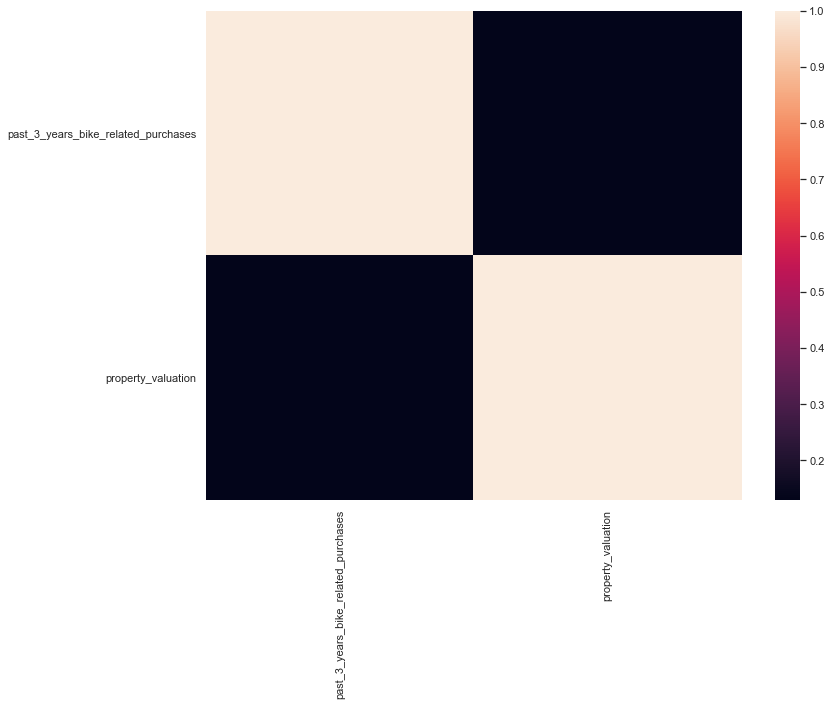

In [59]:
sns.heatmap(df_top_potential_cust.corr())
plt.gcf().set_size_inches(12,9)

In [60]:
df_top_potential_cust.job_industry_category.unique()

array(['Manufacturing', 'Retail', 'Financial Services', 'Entertainment',
       nan, 'Property', 'Health', 'Telecommunications', 'IT',
       'Argiculture'], dtype=object)

# CHECKING for null values 

In [61]:
for i in range(len(df_top_potential_cust.columns)):
    print(df_top_potential_cust.columns[i], ':', df_top_potential_cust[df_top_potential_cust.columns[i]].isna().sum())

first_name : 0
last_name : 2
gender : 0
DOB : 2
past_3_years_bike_related_purchases : 0
property_valuation : 0
job_title : 18
job_industry_category : 28
address : 0
state : 0


In [62]:
# SEGMENTATION of YEAR by DOB

df_top_potential_cust['DOB']= pd.to_datetime( df_top_potential_cust['DOB'])

In [63]:
# NOW seperate and EXTRACT the YEAR and month
df_top_potential_cust['year'], df_top_potential_cust['month']= df_top_potential_cust['DOB'].dt.year, df_top_potential_cust['DOB'].dt.month

In [64]:
df_top_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state,year,month
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD,1957.0,7.0
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD,1995.0,1.0
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW,1954.0,3.0


In [65]:
df_top_potential_cust['year']= (df_top_potential_cust['year'].values).astype(int)

In [66]:
df_top_potential_cust.head(3)

,first_name,last_name,gender,DOB,past_3_years_bike_related_purchases,property_valuation,job_title,job_industry_category,address,state,year,month
0,Chickie,Brister,Male,1957-07-12,86,6,General Manager,Manufacturing,45 Shopko Center,QLD,1957,7.0
1,Rockwell,Matson,Male,1995-01-01,94,6,Programmer Analyst I,Retail,3682 Crowley Point,QLD,1995,1.0
2,Dukie,Swire,Male,1954-03-31,88,8,NaN,Manufacturing,64 Granby Parkway,NSW,1954,3.0


# Customers with NO job title BUT HOLDS JOB industry Category

In [67]:
df_top_potential_cust[['first_name', 'year','property_valuation','past_3_years_bike_related_purchases']][(df_top_potential_cust['job_title'].isna()) & (df_top_potential_cust['job_industry_category'].isna())] #or (df_top_potential_cust[df_top_potential_cust['job_industry_category']].isna())]

,first_name,year,property_valuation,past_3_years_bike_related_purchases
9,Brooke,1961,5,76
66,Marcelia,1946,8,81
124,Andrea,1938,6,86
147,Launce,1939,9,86


In [68]:
df_top_potential_cust[['first_name', 'year','property_valuation','past_3_years_bike_related_purchases','job_industry_category']][df_top_potential_cust['job_title'].isna()].count()

first_name                             18
year                                   18
property_valuation                     18
past_3_years_bike_related_purchases    18
job_industry_category                  14
dtype: int64

In [69]:
max(df_top_potential_cust['year']),min(df_top_potential_cust['year']) 

(2001, -2147483648)

In [70]:
df_top_potential_cust_missing_age= df_top_potential_cust.iloc[159]
df_top_potential_cust_missing_age

first_name                                                Pauline
last_name                                                Dallosso
gender                                                          U
DOB                                                           NaT
past_3_years_bike_related_purchases                            82
property_valuation                                             10
job_title                              Desktop Support Technician
job_industry_category                                          IT
address                                        9594 Badeau Street
state                                                         NSW
year                                                  -2147483648
month                                                         NaN
Name: 159, dtype: object

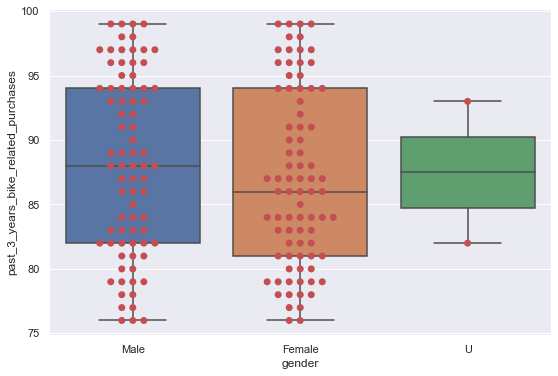

In [71]:
sns.swarmplot(df_top_potential_cust['gender'], df_top_potential_cust['past_3_years_bike_related_purchases'], color='r', size=7)
sns.boxplot(df_top_potential_cust['gender'], df_top_potential_cust['past_3_years_bike_related_purchases'])

plt.gcf().set_size_inches(9,6)

## AVERAGE median salary based on job category

In [72]:
df_md_salary_industry.head(3)

,Industry,August 2014 ($),August 2019 ($)
0,"Agriculture, forestry and fishing",850.0,1038.0
1,Mining,2115.0,2300.0
2,Manufacturing,1050.0,1125.0


In [73]:
df_md_salary_industry.Industry.unique()

array(['Agriculture, forestry and fishing', 'Mining', 'Manufacturing',
       'Electricity, gas, water and waste services', 'Construction',
       'Wholesale trade', 'Retail trade',
       'Accommodation and food services',
       'Transport, postal and warehousing',
       'Information media and telecommunications',
       'Financial and insurance services',
       'Rental, hiring and real estate services',
       'Professional, scientific and technical services',
       'Administrative and support services',
       'Public administration and safety', 'Education and training',
       'Health care and social assistance',
       'Arts and recreation services', 'Other services', nan,
       'Source: Table 3.',
       'Source: Australian Bureau of Statistics,  Characteristics of Employment, Australia August 2019'],
      dtype=object)

# JOB industry of NEW CUSTOMERS that falls under the Category of BEAUREA of statistics

In [74]:
new_cust_job_cat= df_top_potential_cust.job_industry_category.unique()

In [75]:
new_cust_job_cat

array(['Manufacturing', 'Retail', 'Financial Services', 'Entertainment',
       nan, 'Property', 'Health', 'Telecommunications', 'IT',
       'Argiculture'], dtype=object)

In [76]:
list_for_new_job= ['Agriculture','Manufacturing', 'Retail trade','Professional, scientific and technical services','Information media and telecommunications','Health care and social assistance','Financial and insurance services','Arts and recreation services', 'Other services']

In [77]:
len(df_md_salary_industry[:-4])

19

In [78]:
df_md_salary_industry.Industry[5]

'Wholesale trade'

# INFORMATION on EXISTING CUSTOMERS

# ANALYSIS on the PRODUCTS SOLD by transaction ID and customer ID

In [79]:
cust_info= pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [80]:
df_cust_transactions= pd.read_excel(cust_info, 'Transactions') #customer TRANSACTIONS
df_cust_demo= pd.read_excel(cust_info, 'CustomerDemographic')

In [81]:
df_cust_transactions.head(4)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0


# check if there any NULL VALUES

In [82]:
for i in range(len(df_cust_transactions.columns)):
    
    print(df_cust_transactions.columns[i], ':', df_cust_transactions[df_cust_transactions.columns[i]].isna().sum())
    

transaction_id : 0
product_id : 0
customer_id : 0
transaction_date : 0
online_order : 360
order_status : 0
brand : 197
product_line : 197
product_class : 197
product_size : 197
list_price : 0
standard_cost : 197
product_first_sold_date : 197


In [83]:
# CUSTOMERS ID
len(df_cust_transactions.customer_id.unique())

3494

# The total number of customers = 3494 

In [84]:
cust_id= df_cust_transactions.customer_id.unique()

# Customer demographics by transactions

In [85]:
df_cust_demo.first_name[df_cust_demo['gender'].isna()]

4000    NaN
Name: first_name, dtype: object

In [86]:
# replace the F with, female and M with Male

gen= ['Female', 'Male']

for i in range(len(df_cust_demo.gender)):
    
   # if (df_cust_demo.gender[i] == 'F'):
        df_cust_demo.columns[i].replace('F', 'Female')
    
   # if( df_cust_demo.gender[i] == 'M'):
    #    df_cust_demo.gender[i].replace('M', 'Male')

IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:
df_cust_demo.gender.unique()

In [ ]:
sns.pairplot(df_cust_demo, hue='gender')
plt.show()

# WHICH brand is MOST Selling?`

In [ ]:
df_cust_demo.head(3)